In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
def damage_formula_one(attack: int, defense: int):
    return attack / defense * int(attack / defense >= 0)

def damage_formula_two(attack, defense):
    return (attack**2) / defense

def damage_formula_three(attack, defense):
    return (attack - attack / defense) ** 2 / defense

def damage_formula_four(attack, defense):
    return attack * (1 - (1 / defense))

def damage_formula_five(attack, defense):
    return attack * (attack / (attack + defense))

In [197]:
def get_values(count: int = 50, defense=10, formula=damage_formula_one):
    df = pd.DataFrame(columns = ["attack", "defense"])
    nums = [i for i in range(1, count + 1)]
    df["attack"] = nums
    df["defense"] = defense

    # Attack -> defense
    result = []
    for attack, defense in df[["attack", "defense"]].values:
        result.append(formula(attack, defense))
    df["result"] = result
    
    return df


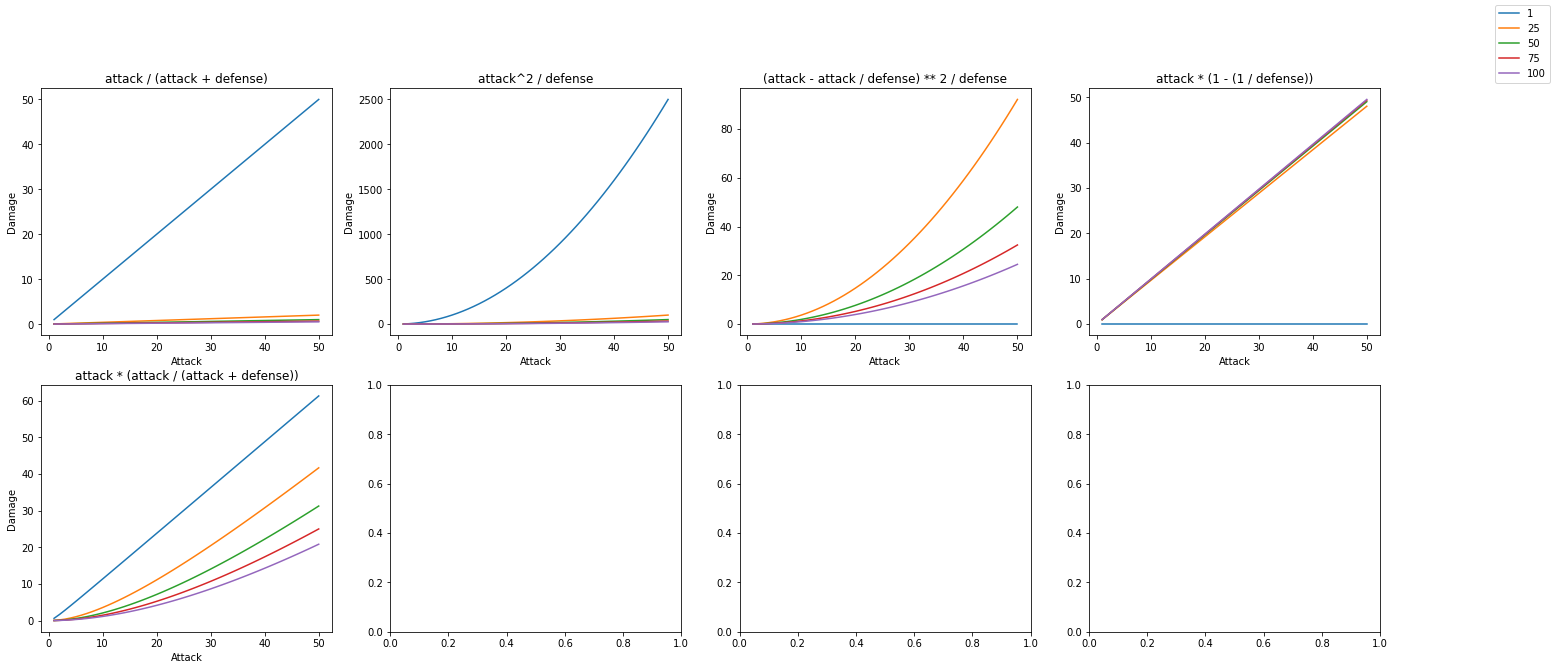

In [198]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (24, 10))

DEFENSE_VALUES = [1, 25, 50, 75, 100]

ax[0][0].set_xlabel("Attack")
ax[0][0].set_ylabel("Damage")
ax[0][0].set_title("attack / (attack + defense)")
for val in DEFENSE_VALUES:
    df = get_values(defense=val, formula=damage_formula_one)
    ax[0][0].plot(df["attack"], df["result"]);


ax[0][1].set_xlabel("Attack")
ax[0][1].set_ylabel("Damage")
ax[0][1].set_title("attack^2 / defense")
for val in DEFENSE_VALUES:
    df2 = get_values(defense = val, formula=damage_formula_two)
    ax[0][1].plot(df2["attack"], df2["result"]);

ax[0][2].set_xlabel("Attack")
ax[0][2].set_ylabel("Damage")
ax[0][2].set_title("(attack - attack / defense) ** 2 / defense")
for val in DEFENSE_VALUES:
    df3 = get_values(defense = val, formula=damage_formula_three)
    ax[0][2].plot(df3["attack"], df3["result"]);

ax[0][3].set_xlabel("Attack")
ax[0][3].set_ylabel("Damage")
ax[0][3].set_title("attack * (1 - (1 / defense))")
for val in DEFENSE_VALUES:
    df4 = get_values(defense = val, formula=damage_formula_four)
    ax[0][3].plot(df4["attack"], df4["result"]);

ax[1][0].set_xlabel("Attack")
ax[1][0].set_ylabel("Damage")
ax[1][0].set_title("attack * (attack / (attack + defense))")
for val in DEFENSE_VALUES:
    df5 = get_values(defense = val, formula=damage_formula_five)
    ax[1][0].plot(df5["attack"], df5["result"]);

fig.legend(labels=DEFENSE_VALUES);